In [1]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from matplotlib.patches import ArrowStyle, Rectangle

In [2]:
model_name = ["OPT-1.3B", "Phi-2B", "Yi-6B", "Llama-2-7B", "Llama-2-13B", "Llama-3-8B"]
model_name_dict = {
    "OPT-1.3B": "opt_1_point_3", 
    "Phi-2B": "phi_2",
    "Yi-6B": "yi_6",
    "Llama-2-7B": "llama_2_7", 
    "Llama-2-13B": "llama_2_13", 
    "Llama-3-8B": "llama_3_8", 
}

In [3]:
model_error_list = np.zeros((6, len(model_name)))
model_size_list = np.zeros((6, len(model_name)))

base_path = './model_fp3_sv_profile'
for idx, name in enumerate(model_name):
    for jdx, outlier in enumerate([5, 6, 7, 8, 9, 0]):
        file_path = f'{base_path}/{model_name_dict[name]}_outlier_{outlier}.pickle'
        with open(file_path, 'rb') as f:
            model_size_config, model_error_config = pickle.load(f)
            
        total_error   = 0
        total_element = 0
        for layer_name in model_size_config.keys():
            total_error += model_error_config[layer_name]
            total_element += model_size_config[layer_name]
    
        model_error_list[jdx, idx] = total_error
        model_size_list[jdx, idx] = total_element

norm_error_list = model_error_list / np.min(model_error_list, axis=0)

## Normalized Range and Maximum Value

In [4]:
linestyle   = 'solid'
alpha       = 1
tick_size   = 10
ylabel_size = 10.5
xlabel_size = 9.5
legend_size = 9.
title_size  = 10
text_size   = 8

# bar setting
width      = 0.016  # the width of each bar
edgewidth  = 0.8 # the edge width of each bar
hatchwidth = 0.5 # the edge width of each bar
spacing    = 0.14 # spacing between each model bar
distance   = 0.006  # spacing between every two bars of the same model

x          = np.arange(len(model_name))*spacing # the label locations

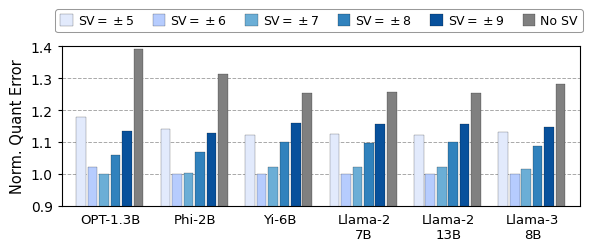

In [6]:
figwidth    = 6
figheight   = 2.3

y_title_pad = 0
title_yloc  = 0.89
rotation = 0
x_margin = 0.03

############# Arrow Style #############
arrowstyle = ArrowStyle.CurveB(head_length=0.4, head_width=0.2, widthA=0.2, widthB=1.0, lengthA=0., lengthB=0., angleA=0, angleB=0, scaleA=None, scaleB=None)
arrowstyle._beginarrow_head = False
arrowstyle._beginarrow_bracket = True
#######################################

f, ax = plt.subplots(1, 1)
f.set_figwidth(figwidth)
f.set_figheight(figheight)
f.tight_layout(pad=1)

f_list = [i for i in range(6)]
color_list = ['#e2eafc', '#b6ccfe', '#6baed6', '#3182bd', '#08519c', 'gray']
alpha_list = [1, 1, 1, 1, 1, 1]
xlabels = ['OPT-1.3B', 'Phi-2B', 'Yi-6B', 'Llama-2\n7B', 'Llama-2\n13B', 'Llama-3\n8B']

for j_tmp in range(-3, 3):
    j = j_tmp + 3
    f_list[j] = ax.bar(x + j_tmp*width + distance*j_tmp/2, norm_error_list[j], 
                          width, color='white')
    f_list[j] = ax.bar(x + j_tmp*width + distance*j_tmp/2, norm_error_list[j], 
                          width, color=color_list[j], alpha=alpha_list[j], edgecolor='black', linewidth=0.15)

ax.set_xmargin(x_margin)

y_low = 0.9
y_up  = 1.4 + 0.001
ax.set_ylim(y_low, y_up)
ax.set_yticks(np.arange(y_low, y_up, 0.1))

ax.set_xticks(x - 0.5*width, )
ax.set_xticklabels(xlabels, rotation=rotation)
ax.tick_params(axis='y', which='major', labelsize=tick_size, length=3)
ax.tick_params(axis='x', which='major', labelsize=xlabel_size, pad=5, length=0)

ax.set_ylabel('Norm. Quant Error', fontsize=ylabel_size, labelpad=4)

ax.set_axisbelow(True)
ax.grid(True, linestyle='dashed', axis='y', zorder=1000, color='darkgrey', linewidth=0.7)

leg = f.legend(f_list, ['SV' + r'$ = \pm$' + str(i) for i in range(5, 10)] + ['No SV'], 
        loc='upper center', bbox_to_anchor=[0.54, 1.1], 
        fontsize=legend_size, ncol=6, columnspacing=1.5, frameon=True, edgecolor='grey', handlelength=1, handleheight=1, handletextpad=0.4)
leg.get_frame().set_linewidth(0.75)

plt.tight_layout(h_pad=0, w_pad=0.8)
f.savefig('fp3_sv.svg', transparent=True, bbox_inches = 'tight', format='svg', dpi=200, pad_inches=0.1)
